<a href="https://colab.research.google.com/github/VegetaSan1/Machine-Learning-Projects/blob/main/Googlestockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('trainset.csv')
test=pd.read_csv('testset.csv')

In [ ]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [ ]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [ ]:
train1=train
test1=test

In [ ]:
del train1['Open']
del train1['High']
del train1['Low']
del train1['Adj Close']
del train1['Volume']
del test1['Open']
del test1['High']
del test1['Low']
del test1['Adj Close']
del test1['Volume']

In [ ]:
train1

,Date,Close
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [ ]:
test1

,Date,Close
0,2018-01-02,1065.000000
1,2018-01-03,1082.479980
2,2018-01-04,1086.400024
3,2018-01-05,1102.229980
4,2018-01-08,1106.939941
...,...,...
120,2018-06-25,1124.810059
121,2018-06-26,1118.459961
122,2018-06-27,1103.979980
123,2018-06-28,1114.219971


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   Close   1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
train1.describe()

,Close
count,1259.000000
mean,652.657015
std,175.820993
min,349.164032
25%,528.429413
50%,598.005554
75%,772.720002
max,1077.140015


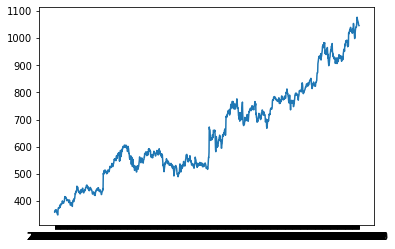

In [ ]:
plt.plot(train1['Date'],train1['Close'])

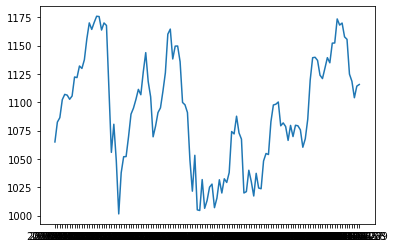

In [ ]:
plt.plot(test1['Date'],test1['Close'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))
train1=ms.fit_transform(train1[['Close']])
test1=ms.fit_transform(test1[['Close']])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1259):
  x_train.append(train1[i-60:i,0])
  y_train.append(train1[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1199, 60, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 8s 81ms/step - loss: 0.0479
Epoch 2/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0047
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0032
Epoch 4/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0041
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0031
Epoch 7/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0033
Epoch 8/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0030
Epoch 9/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0023
Epoch 11/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0029
Epoch 12/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0026
Epoch 13/100
38/38 [=====

In [ ]:
total=pd.concat((train['Close'],test['Close']),axis=0)
inputs=total[len(total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=ms.transform(inputs)

In [ ]:
inputs.shape

(185, 1)

In [ ]:
x_test=[]
for i in range(60,185):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
x_test.shape

(125, 60, 1)

In [ ]:
pred= model.predict(x_test)
pred= ms.inverse_transform(pred)
pred

array([[1046.2091 ],
       [1048.1327 ],
       [1056.5787 ],
       [1067.9343 ],
       [1080.7303 ],
       [1091.9745 ],
       [1099.0907 ],
       [1101.3037 ],
       [1101.0162 ],
       [1103.291  ],
       [1107.0441 ],
       [1112.7462 ],
       [1117.7704 ],
       [1122.6884 ],
       [1130.5309 ],
       [1141.4608 ],
       [1149.7909 ],
       [1155.6111 ],
       [1160.1193 ],
       [1163.071  ],
       [1162.1273 ],
       [1161.0952 ],
       [1160.3988 ],
       [1148.9113 ],
       [1124.6273 ],
       [1102.713  ],
       [1083.1417 ],
       [1061.5585 ],
       [1047.2555 ],
       [1044.5365 ],
       [1050.2356 ],
       [1061.678  ],
       [1076.6107 ],
       [1090.0564 ],
       [1099.6917 ],
       [1106.047  ],
       [1107.9032 ],
       [1110.6989 ],
       [1117.4075 ],
       [1119.2781 ],
       [1114.594  ],
       [1101.0797 ],
       [1087.5282 ],
       [1080.4069 ],
       [1080.5856 ],
       [1087.9913 ],
       [1101.0107 ],
       [1120.

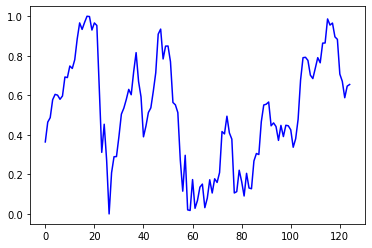

In [ ]:
plt.plot(test1,color='blue')

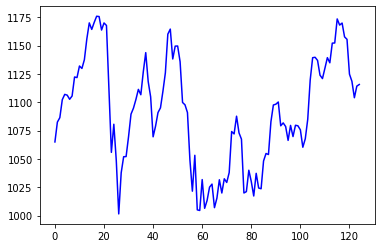

In [ ]:
plt.plot(test['Close'],color='blue')

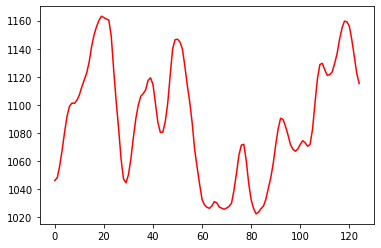

In [ ]:
plt.plot(pred,color='red')

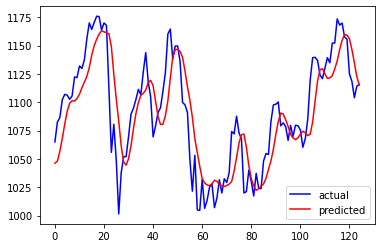

In [ ]:
plt.plot(test['Close'],color='blue',label = 'actual')
plt.plot(pred,color='red',label = 'predicted')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [ ]:
tt=train['Close']

In [ ]:
tt.shape

(1259,)

In [ ]:
x_train.shape

(1199, 60, 1)

In [ ]:
y_train.shape

(1199,)

In [ ]:
pred.shape

(125, 1)

In [ ]:
model.evaluate(tt,pred)

ValueError: ignored